# DOPF

OEDI SI use case for distributed optimal power flow (DOPF)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
import pandas as pd
import os
import pyarrow.feather as feather


## Build the scenario for IEEE-123 system

In [2]:

os.system(f"oedisi build --system system.json") 

## Run Simulation

In [ ]:
os.system("pkill -9 helics_broker")
os.system(f"oedisi run --runner build/system_runner.json")

## Plot result

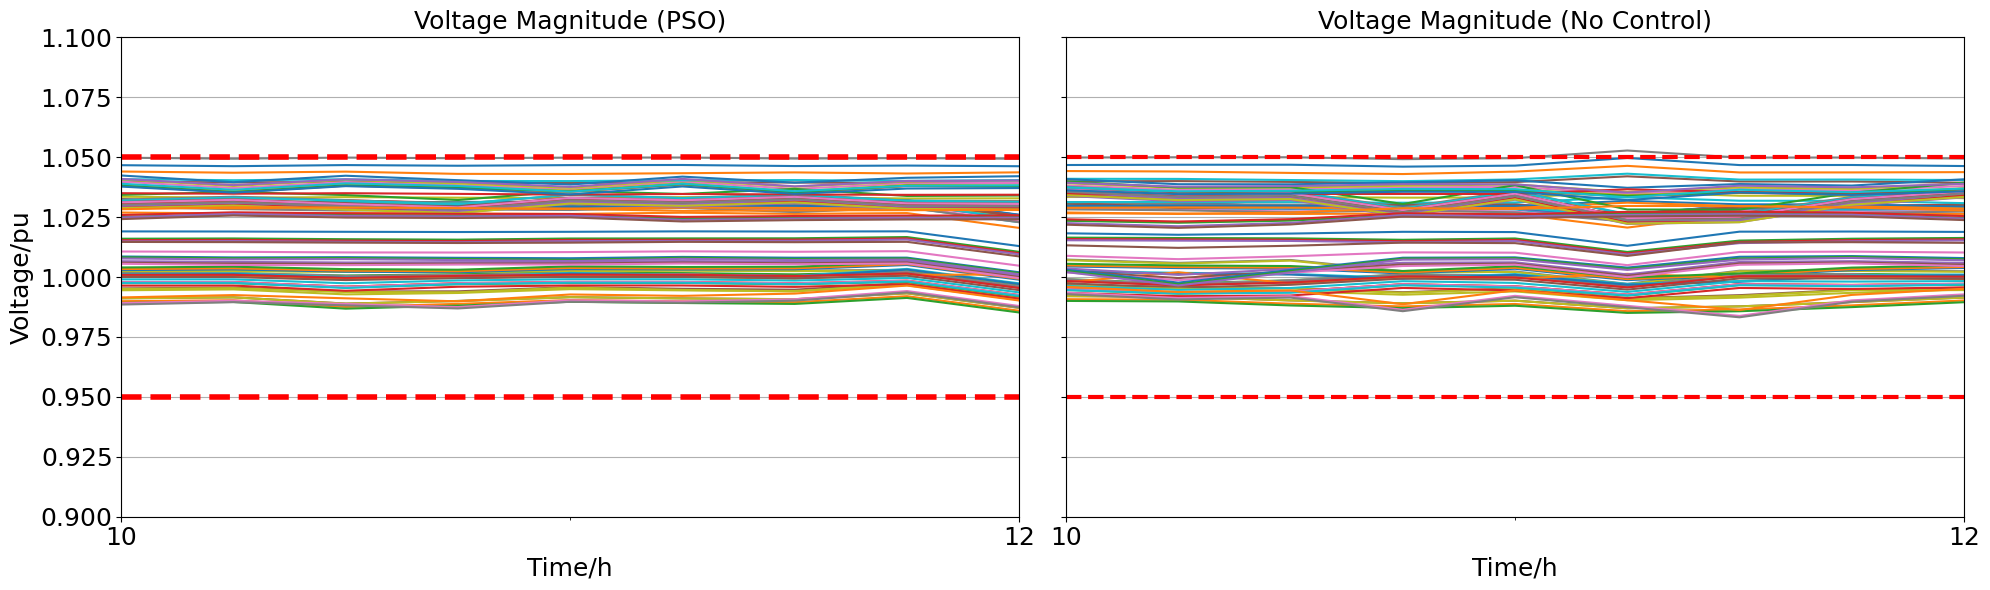

In [11]:
# Directory location base
directory_base = 'dopf_federate/'
voltage_filepath_base = os.path.join(directory_base, "opf_voltage_mag.feather")
voltage_mag_base = feather.read_feather(voltage_filepath_base)
df_voltages_base = voltage_mag_base.drop("time", axis=1)
# Directory location
directory = 'build/recorder_opf_voltage_magnitude/'
voltage_filepath = os.path.join(directory, "opf_voltage_mag.feather")
voltage_mag = feather.read_feather(voltage_filepath)
df_voltages = voltage_mag.drop("time", axis=1)
# print(df_voltages)

font_size = 18
fz = (20, 6)  # Adjusted figsize for two subplots
start_time = 10
hour_value = np.array([i/4 for i in range(df_voltages_base.values.shape[0])]).reshape(-1, 1) + start_time

fig, axs = plt.subplots(1, 2, figsize=fz, sharey=True)
# Plot for df_voltages
axs[0].plot(hour_value, df_voltages.values)
axs[0].axhline(y=0.95, color='r', linestyle='--', linewidth=4)  # Red line at y=0.95
axs[0].axhline(y=1.05, color='r', linestyle='--', linewidth=4)  # Red line at y=1.05
axs[0].set_xlabel('Time/h', fontsize=font_size)
axs[0].set_ylabel('Voltage/pu', fontsize=font_size)
axs[0].set_xticks(range(0, 25))
axs[0].tick_params(axis='x', labelsize=font_size)
axs[0].tick_params(axis='y', labelsize=font_size)
axs[0].grid(True)
axs[0].set_xlim(10, 12)
axs[0].xaxis.set_major_locator(MultipleLocator(2))
axs[0].xaxis.set_minor_locator(MultipleLocator(1))
axs[0].set_ylim(0.9, 1.1)
axs[0].yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False, useMathText=True))
axs[0].set_title('Voltage Magnitude (PSO)', fontsize=font_size)

# Plot for df_voltages_base
axs[1].plot(hour_value, df_voltages_base.values)
axs[1].axhline(y=0.95, color='r', linestyle='--', linewidth=3)  # Red line at y=0.95
axs[1].axhline(y=1.05, color='r', linestyle='--', linewidth=3)  # Red line at y=1.05
axs[1].set_xlabel('Time/h', fontsize=font_size)
axs[1].set_xticks(range(0, 25))
axs[1].tick_params(axis='x', labelsize=font_size)
axs[1].tick_params(axis='y', labelsize=font_size)
axs[1].grid(True)
axs[1].set_xlim(10, 12)
axs[1].xaxis.set_major_locator(MultipleLocator(2))
axs[1].xaxis.set_minor_locator(MultipleLocator(1))
axs[1].set_ylim(0.9, 1.1)
axs[1].yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False, useMathText=True))
axs[1].set_title('Voltage Magnitude (No Control)', fontsize=font_size)

plt.tight_layout()
plt.show()